In [ ]:
%load_ext autoreload
%autoreload 2
import omegaconf
from hydra.utils import instantiate
from hydra import initialize, compose


In [ ]:
with initialize(version_base=None, config_path="sub_projects/ray_optimization/conf"):
    # config is relative to a module
    cfg = compose(config_name="config", overrides=["logging_backend=",
                "+logging_backend._target_=ray_optim.logging.DebugPlotBackend", "target_configuration=metrixs", "target_configuration.max_target_deviation=0.0001"],)
    #print(omegaconf.OmegaConf.to_yaml(cfg))
    ray_optimization = instantiate(cfg)
    ray_optimization.setup_target()
    #print(ray_optimization.target.observed_rays[1]['ray_output']['ImagePlane']['0.0'].x_loc.shape)
    #ray_optimization.optimize()

In [ ]:
for i in range(len(ray_optimization.target.observed_rays)):
    image_plane = ray_optimization.target.observed_rays[i]['ray_output']['ImagePlane']
    print([v.x_loc.numel() for v in image_plane.values()])
#print(v.x_loc.numel())
#list(image_plane.keys())[0]
#ray_optimization.target.search_space
for key, value in ray_optimization.target.uncompensated_parameters[0].items():
    print(key, value, ray_optimization.target.observed_rays[0]['param_container_dict'][key])

In [ ]:
ray_optimization.target.observed_rays[0]['param_container_dict']

0it [00:00, ?it/s]

43it [00:00, 58.18it/s]


tensor(-0.0744)

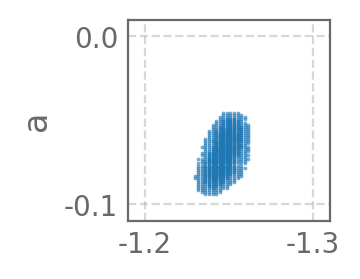

In [2]:
from sub_projects.ray_optimization.real_data import import_data
from sub_projects.ray_optimization.utils import ray_output_to_tensor
from ray_optim.plot import Plot
import plotly
%matplotlib inline
import matplotlib.pyplot as plt
z_layers=[-15., -10., -5., 0., 5., 10., 15., 20., 25., 30.]
z_layers=[5.]
data = import_data('datasets/metrix_real_data/2021_march_complete/', ['M04'], z_layers)
observed = ray_output_to_tensor(data, 'ImagePlane')
Plot.fixed_position_plot_base([observed], (-1.20, -1.3), (-0.1, 0.0), ylabel=["a"], covariance_ellipse=False)
observed[0][0, -1, 1].mean()
#Plot.fancy_ray(
#    [observed],
#    ["Observed"],
#    z_index=z_layers
#)